## Creates the real run vs Icarust Run image

The images were taken from a retinal panel adaptive sampling run that was uploaded to MinoTour. 

Raw data was flowcell ID retinal_sim_004 and sample id  retinal_hg38_sim_002

Target was Chr 11, 12,666,921–12,952,237, the TEAD gene.

In [32]:
from pathlib import Path

print(Path().cwd())

import matplotlib.font_manager as font_manager
import matplotlib.image as img
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec

/home/adoni5/Projects/Chapter_1_Data/simulated_run


In [7]:
plt.style.use("../dotfiles-rm/thesis/thesis.mplstyle")
font_dir = "../dotfiles-rm/"
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
sns.set_palette("colorblind")
rcParams["font.family"] = "Roboto"

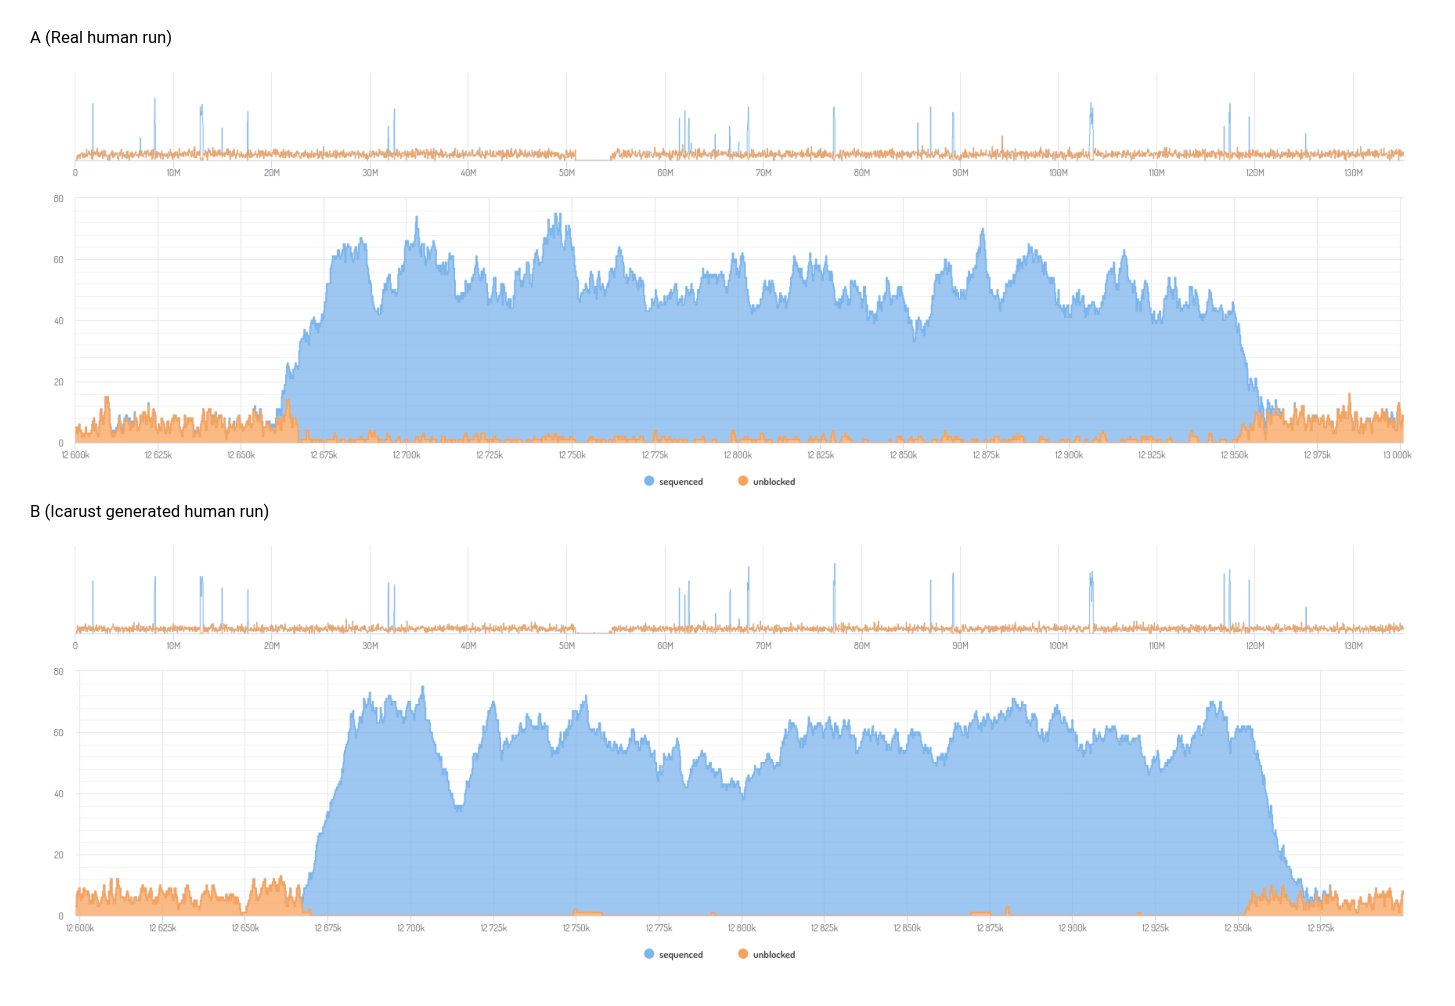

In [10]:
icarust_shot = img.imread("icarust_full.png")
real_shot = img.imread("real_full.png")
fig = plt.figure(figsize=(6, 4))
gs = GridSpec(2, 1, figure=fig)
ax2 = fig.add_subplot(gs[0, :])
ax3 = fig.add_subplot(gs[1, :])
ax2.imshow(real_shot, aspect="equal")
ax2.set_axis_off()
ax2.text(
    0,
    1.05,
    "A (Real human run)",
    transform=ax2.transAxes,
    fontsize=4,
    fontweight="normal",
)
ax3.imshow(icarust_shot, aspect="equal")
ax3.text(
    0,
    1.05,
    "B (Icarust generated human run)",
    transform=ax3.transAxes,
    fontsize=4,
    fontweight="normal",
)
ax3.set_axis_off()
plt.subplots_adjust(hspace=0.05)

In [11]:
fig.savefig("icarust_run_comparisons.png", bbox_inches="tight", dpi=600)

## Table of run metrics as reported by minotour



In [61]:
from dataclasses import dataclass
from datetime import datetime


@dataclass
class Data:
    combined_run_time: int
    sequenced_yield: float
    unblocked_yield: float
    sequenced_mean_read_length: int
    unblocked_mean_read_length: int

    def calculate_combined_yield(self):
        return self.unblocked_yield + self.sequenced_yield


# Define the string
date_string = "19 Jul 2022, 10:03 AM"

# Define the format string to match the input format
format_string = "%d %b %Y, %I:%M %p"

# Parse the string into a datetime object
real_run_start = datetime.strptime(date_string, format_string)
real_run_end = datetime.strptime("23 Jul 2022, 11:01 am", format_string)
real_run_length = real_run_end - real_run_start
# Example usage
real_run = Data(
    combined_run_time=real_run_length,
    unblocked_yield=80396508709,
    unblocked_mean_read_length=928,
    sequenced_yield=9277229158,
    sequenced_mean_read_length=4000,
)

# Parse the string into a datetime object
sim_run_start = datetime.strptime("25 Nov 2022, 2:55 pm", format_string)
sim_run_end = datetime.strptime("29 Nov 2022, 10:36 am", format_string)
sim_run_length = sim_run_end - sim_run_start
# Example usage
sim_run = Data(
    combined_run_time=sim_run_length,
    unblocked_yield=57088121343,
    unblocked_mean_read_length=840,
    sequenced_yield=12223307266,
    sequenced_mean_read_length=11734,
)

In [64]:
def format_bases(num: int, factor: int = 1000, suffix: str = "B") -> str:
    """Return a human readable string of a large number using SI unit prefixes

    :pararm num: A number to convert to decimal form
    :param factor: The SI factor, use 1000 for SI units and 1024 for binary multiples
    :param suffix: The suffix to place after the SI prefix, for example use B for SI units and iB for binary multiples
    :return: The input number formatted to two decimal places with the SI unit and suffix

    :Example:

    >>> format_bases(1_000)
    '1.00 kB'
    >>> format_bases(1_000_000)
    '1.00 MB'
    >>> format_bases(1_630_000)
    '1.63 MB'
    >>> format_bases(1_000_000_000)
    '1.00 GB'
    """
    if num < factor:
        return f"{num} {suffix}"
    for unit in ["", "k", "M", "G", "T", "P", "E", "Z"]:
        if abs(num) < factor:
            return f"{num:3.2f} {unit}{suffix}"
        num /= factor
    return f"{num:3.2f} Y{suffix}"

In [66]:
sim_run.__dict__.keys()

dict_keys(['combined_run_time', 'sequenced_yield', 'unblocked_yield', 'sequenced_mean_read_length', 'unblocked_mean_read_length'])

In [67]:
df = pd.DataFrame([sim_run.__dict__, real_run.__dict__])
df["Run type"] = ["Real", "Icarust R9"][::-1]
names = (
    "Run time",
    "Seq. Yield",
    "Unb. Yield",
    "Seq. Mean length",
    "Unb. Mean length",
)
df = df.rename(columns=dict(zip(sim_run.__dict__.keys(), names)))
base_cols = ["Unb. Yield", "Unb. Mean length", "Seq. Yield", "Seq. Mean length"]
df[base_cols] = df[base_cols].map(format_bases)
print(
    df.style.hide(level=0, axis=0).to_latex(
        hrules=True,
        caption=(
            "Run metrics for real and an Icarust R9 simulated run.",
            "Run metrics for real and simulated sequencing runs.",
        ),
        label="tab:icarust-run-metrics",
    )
)

\begin{table}
\caption[Run metrics for real and simulated sequencing runs.]{Run metrics for real and an Icarust R9 simulated run.}
\label{tab:icarust-run-metrics}
\begin{tabular}{llllll}
\toprule
Run time & Seq. Yield & Unb. Yield & Seq. Mean length & Unb. Mean length & Run type \\
\midrule
3 days 19:41:00 & 12.22 GB & 57.09 GB & 11.73 kB & 840 B & Simulated \\
4 days 00:58:00 & 9.28 GB & 80.40 GB & 4.00 kB & 928 B & Real \\
\bottomrule
\end{tabular}
\end{table}

